<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Các-thư-viện-sử-dụng" data-toc-modified-id="Các-thư-viện-sử-dụng-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Các thư viện sử dụng</a></span></li><li><span><a href="#Danh-sách-kiểm-tra-phân-tích-dữ-liệu" data-toc-modified-id="Danh-sách-kiểm-tra-phân-tích-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Danh sách kiểm tra phân tích dữ liệu</a></span></li><li><span><a href="#Tiền-xử-lý-dữ-liệu" data-toc-modified-id="Tiền-xử-lý-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tiền xử lý dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Sai-kiểu-dữ-liệu" data-toc-modified-id="Sai-kiểu-dữ-liệu-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sai kiểu dữ liệu</a></span></li><li><span><a href="#Giá-trị-thiếu-(missing-values)" data-toc-modified-id="Giá-trị-thiếu-(missing-values)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Giá trị thiếu (missing values)</a></span></li><li><span><a href="#Xử-lý-dữ-liệu-nhiễu" data-toc-modified-id="Xử-lý-dữ-liệu-nhiễu-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Xử lý dữ liệu nhiễu</a></span></li></ul></li><li><span><a href="#Phân-tích-dữ-liệu" data-toc-modified-id="Phân-tích-dữ-liệu-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Phân tích dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Xu-hướng-nghe-nhạc-qua-từng-năm" data-toc-modified-id="Xu-hướng-nghe-nhạc-qua-từng-năm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Xu hướng nghe nhạc qua từng năm</a></span></li><li><span><a href="#Đất-nước-có-nhiều-nghệ-sĩ-được-xác-minh-(verified)" data-toc-modified-id="Đất-nước-có-nhiều-nghệ-sĩ-được-xác-minh-(verified)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Đất nước có nhiều nghệ sĩ được xác minh (verified)</a></span></li><li><span><a href="#Sự-tương-quan-giữa-nghệ-sĩ-được-xác-minh-(verified)-và-lượt-nghe-các-track-của-họ" data-toc-modified-id="Sự-tương-quan-giữa-nghệ-sĩ-được-xác-minh-(verified)-và-lượt-nghe-các-track-của-họ-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sự tương quan giữa nghệ sĩ được xác minh (verified) và lượt nghe các track của họ</a></span></li></ul></li></ul></div>

## Các thư viện sử dụng

In [1]:
from datetime import datetime
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Danh sách kiểm tra phân tích dữ liệu
Dưới đây là các câu hỏi được quan tâm:
- **Xu hướng nghe nhạc qua từng năm?**
  - Bảng dữ liệu cần sử dụng: `track`
  - Các trường cần sử dụng: `genre`, `created_at`
  - Kiểu dữ liệu mong đợi của các trường được sử dụng:
    - `genre`: *string*
    - `created_at`: *datetime*
  - Các vấn đề có thể xảy ra: `genre` chứa missing values do có thể người dùng không nhập và một số người dùng tự định nghĩa `genre` của bản thân.
  - Hướng giải quyết: sử dụng **Line chart** để trực quan hóa sự thay đổi của dòng nhạc và số lượng track tương ứng qua từng năm.
  - Dự đoán kết quả: EDM chắc sẽ là cái tên phổ biến ở các năm gần đây, xa hơn nữa có thể là R&B hay Rock.
- **Đất nước nào có nhiều nghệ sĩ đã được xác minh (verified)?**
  - Bảng dữ liệu cần sử dụng: `user`
  - Các trường cần sử dụng: `verified`, `country_code`
  - Kiểu dữ liệu mong đợi của các trường được sử dụng:
    - `verified`: *boolean*
    - `country_code`: *string*
  - Các vấn đề có thể xảy ra: `country_code` có thể chứa missing values do người dùng không nhập.
  - Hướng giải quyết: sử dụng **Box plot** để trực quan hóa **10** nước có số lượng nghệ sĩ đã được xác minh nhiều nhất.
  - Dự đoán kết quả: Mỹ và Đức sẽ là các quốc gia có lượt verified cao nhất. 
- **Sự tương quan giữa `verified` và `playback_count`**
  - Bảng dữ liệu cần sử dụng: `user` và `track`
  - Các trường cần sử dụng: `id`, `verified` (trong `user`) và `user_id`, `playback_count` (trong `track`)
  - Kiểu dữ liệu mong đợi của các trường được sử dụng:
    - `id`: *int64 / float64*
    - `verified`: *boolean*
    - `user_id`: *int64 / float64* (phải có cùng kiểu với kiểu của trường `id`)
    - `playback_count`: *int64 / float64*
  - Các vấn đề có thể xảy ra: `playback_count` có thể chứa missing values do một số bài bị hạn chế người xem, chế độ *private*.
  - Hướng giải quyết: sử dụng **Thống kê** và **Box plot** để so sánh số lượt nghe của mỗi nhóm.
  - Dự đoán kết quả: Số lượng lượt nghe sẽ cao hơn ở nhóm nghệ sĩ đã được xác minh.

## Tiền xử lý dữ liệu
Với câu hỏi đã đặt ra, chúng ta sẽ chỉ tập trung xử lý:
- Dữ liệu `track`: gồm các trường `genre`, `created_at`, `playback_count` và `user_id`
- Dữ liệu `user`: gồm các trường `id`, `verified` và `country_code`

Đầu tiên, ta tiến hành load dữ liệu từ file `csv` đã chuẩn bị sẵn và lọc ra các trường cần thiết.

In [23]:
# Users
user_df = pd.read_csv('./user.csv')
user_df = user_df[['id', 'verified', 'country_code']].reset_index(drop=True)

# Tracks
track_df = pd.read_csv('./track.csv')
track_df = track_df[['genre', 'created_at', 'playback_count', 'user_id']].reset_index(drop=True)

### Sai kiểu dữ liệu
Để xem xét các trường có sai dữ liệu hay không, chúng ta cần phải coi kiểu dữ liệu hiện tại của các trường đã.

In [24]:
# Users
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12029 non-null  int64 
 1   verified      12029 non-null  bool  
 2   country_code  6554 non-null   object
dtypes: bool(1), int64(1), object(1)
memory usage: 199.8+ KB


In [25]:
# Tracks
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633016 entries, 0 to 633015
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   genre           523931 non-null  object 
 1   created_at      633016 non-null  object 
 2   playback_count  599027 non-null  float64
 3   user_id         633016 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 19.3+ MB


Với kết quả ở trên, ta có nhận xét sau:
- Bảng `user_df`: các trường đều có kiểu dữ liệu như mong đợi.
- Bảng `track_df`: chỉ có trường `created_at` có kiểu dữ liệu `object` khác với mong đợi là `datetime`.

Chúng ta sẽ tiến hành convert kiểu dữ liệu của trường `created_at` sang `datetime`. Trước khi chuyển, chúng ta cần xem xét format của dữ liệu.

In [26]:
track_df['created_at'].head(5)

0    2021-10-29T08:43:42Z
1    2021-10-15T09:37:00Z
2    2021-09-24T08:55:16Z
3    2021-09-17T07:35:14Z
4    2021-09-03T09:40:32Z
Name: created_at, dtype: object

Đây là kiểu dữ liệu ngày giờ theo chuẩn thời gian **ISO 8601**, nên để dễ dàng chuyển đổi, ta sẽ sử dụng thư viện `datetime`.

In [27]:
# Convert từ string sang datetime bằng dateutil.parser
track_df['created_at'] = track_df['created_at'].apply(lambda date: datetime.strptime(date, "%Y-%m-%dT%H:%M:%S%z"))

In [28]:
# Kiểm tra lại
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633016 entries, 0 to 633015
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   genre           523931 non-null  object             
 1   created_at      633016 non-null  datetime64[ns, UTC]
 2   playback_count  599027 non-null  float64            
 3   user_id         633016 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 19.3+ MB


### Giá trị thiếu (missing values)
Tiếp theo, chúng ta sẽ tiến hành xử lý dữ liệu thiếu. Đầu tiên, chúng ta sẽ xem xét xem trường nào bị thiếu, thiếu bao nhiêu và chiếm bao nhiêu phần trăm dữ liệu.

In [29]:
# Users
user_mv = pd.DataFrame()
user_mv['Số lượng'] = user_df.isna().sum().values
user_mv['Phần trăm'] = user_mv['Số lượng'].apply(lambda val: val/user_df.shape[0] * 100)
user_mv.index = user_df.columns

user_mv

,Số lượng,Phần trăm
id,0,0.000000
verified,0,0.000000
country_code,5475,45.515005


In [30]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = track_df.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/track_df.shape[0] * 100)
track_mv.index = track_df.columns

track_mv

,Số lượng,Phần trăm
genre,109085,17.232582
created_at,0,0.000000
playback_count,33989,5.369375
user_id,0,0.000000


Tiếp theo, chúng ta sẽ tiến hành phân tích các trường và đưa ra cách giải quyết phù hợp:
- `country_code`: thuộc kiểu categorical $\rightarrow$ ta coi các missing values là *Quốc gia không xác định* và fill in bằng giá trị `unknown`.
- `genre`: thuộc kiểu categorical $\rightarrow$ chỉ chiếm khoảng 17% và chúng ta không thể phân tích gì được với thể loại nhạc không xác định, cho nên với trường này chúng ta sẽ tiên hành drop các missing values.
- `playback_count`: thuộc kiểu numerical $\rightarrow$ tương tự như trường `genre`, chúng ta sẽ drop các missing values.



In [31]:
# Fill giá trị trường country_code
user_df.fillna(value='unknown', inplace=True)

# Drop mv ở trường genre và playback_count
track_df.dropna(inplace=True)

In [32]:
# Kiểm tra lại
# Users
user_mv = pd.DataFrame()
user_mv['Số lượng'] = user_df.isna().sum().values
user_mv['Phần trăm'] = user_mv['Số lượng'].apply(lambda val: val/user_df.shape[0] * 100)
user_mv.index = user_df.columns

user_mv

,Số lượng,Phần trăm
id,0,0.0
verified,0,0.0
country_code,0,0.0


In [33]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = track_df.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/track_df.shape[0] * 100)
track_mv.index = track_df.columns

track_mv

,Số lượng,Phần trăm
genre,0,0.0
created_at,0,0.0
playback_count,0,0.0
user_id,0,0.0


### Xử lý dữ liệu nhiễu
Đầu tiên chúng ta sẽ kiểm tra miền giá trị của các trường:
- `verified`: chỉ gồm 2 giá trị True và False
- `created_at`: Soundcloud ra đời vào *tháng 8 năm 2018* cho nên miền giá trị của trường này phải bắt đầu từ đây.
- `playback_count` và `user_id`: không được là giá trị âm

In [34]:
# Kiểm tra trường verified
user_df.verified.value_counts()

False    8597
True     3432
Name: verified, dtype: int64

In [35]:
# Tracks
track_df.describe(include='all', datetime_is_numeric=True)

,genre,created_at,playback_count,user_id
count,507762,507762,5.077620e+05,5.077620e+05
unique,41729,NaN,NaN,NaN
top,Electronic,NaN,NaN,NaN
freq,42472,NaN,NaN,NaN
mean,NaN,2018-03-16 02:43:55.400540160+00:00,1.381771e+05,1.163146e+08
min,NaN,2008-09-03 20:49:56+00:00,0.000000e+00,1.870000e+02
25%,NaN,2016-03-31 11:03:01+00:00,9.700000e+02,1.819173e+06
50%,NaN,2018-10-04 14:40:15+00:00,5.079000e+03,2.380901e+07
75%,NaN,2020-06-28 22:47:18.750000128+00:00,2.330600e+04,1.573754e+08
max,NaN,2021-11-08 09:01:38+00:00,2.825388e+08,1.043528e+09


Có vẻ như các trường này đều ổn. Tiếp theo là đến hai trường còn lại, đầu tiên ta xem sơ qua các giá trị của 2 trường này.

In [36]:
# Trường genre
track_df.genre.value_counts()

Electronic        42472
Dance & EDM       37444
House             31727
Techno            20481
Hip-hop & Rap     18706
                  ...  
tune                  1
Larry Heard           1
back to roots         1
Post Balearic         1
Pastel Core           1
Name: genre, Length: 41729, dtype: int64

In [37]:
# Trường country_code
user_df[user_df.country_code != 'unknown'].country_code.value_counts()

US    1742
GB     510
DE     387
JP     366
FR     336
      ... 
GS       1
UM       1
CY       1
AW       1
MZ       1
Name: country_code, Length: 139, dtype: int64

Với kết quả ở trên, ta có một số nhận xét:
- `genre`: một số người dùng tự định nghĩa dòng nhạc của bản thân. Do đó, chỉ lấy những dòng nhạc có từ **500** records trở lên.
- `country_code`: code theo chuẩn [ISO 3166-1 Alpha-2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2), gồm 2 ký tự viết hoa. Do đó, chúng ta sẽ loại những giá trị mà độ dài khác 2 và viết thường.

In [38]:
# Trường genre
## Chọn ra những dòng nhạc chỉ có từ 2 người sử dụng trở lên
genres = track_df.genre.value_counts() >= 500
genres = track_df.genre.value_counts()[genres]
genres = set(genres.index)

## Lọc lại dữ liệu
track_df = track_df[track_df.genre.isin(genres)].reset_index(drop=True)

In [39]:
# Trường country_code
## Chọn ra các code theo chuẩn ISO 3166-1 Alpha-2
country_codes = set(user_df.country_code.value_counts().index)
final_codes = set()
for code in country_codes:
    if re.match('^[A-Z]{2}$', code):
        final_codes.add(code)

len(final_codes)

139

Sau khi lọc lại thì số lượng *unique value* trong `country_code` không thay đổi (bằng **139**)! Do đó, ta sẽ không cần thay đổi bất cứ thứ gì.

Đến đây, dữ liệu của chúng ta đã tương đối *sạch sẽ*. Chúng ta sẽ qua bước kế tiếp: **phân tích dữ liệu**!

## Phân tích dữ liệu
Nhắc lại 2 câu hỏi đã đưa ra:
- Xu hướng nghe nhạc qua từng năm.
- Đất nước nào có nhiều nghệ sĩ được verified? Có liên quan gì đến lượt nghe hay không?

Chúng ta sẽ lần lượt tiến hành phân tích dữ liệu để giải quyết từng câu hỏi
### Xu hướng nghe nhạc qua từng năm
Để giải quyết câu hỏi này, ta sẽ sử dụng dữ liệu `track` với 2 trường: `genre` và `created_at`. Cụ thể, ta sẽ xem xét dòng nhạc nào thịnh hành nhất trong mỗi năm. Các bước thực hiện:
1. Tạo trường mới: `year` chứa năm được trích từ trường `created_at`.
2. Nhóm dữ liệu bởi các giá trị của trường `year`.
3. Với mỗi năm, đếm và lựa ra `genre` xuất hiện nhiều nhất.
4. Sử dụng **Line chart** để trực quan hóa sự thay đổi này.

In [40]:
# Clone dữ liệu để tránh thay đổi tới dữ liệu gốc
data_df = track_df[['genre', 'created_at']].copy()

# Tạo trường mới: year
data_df['year'] = data_df['created_at'].apply(lambda date: date.year)

# Bỏ trường cũ: created_at
data_df.drop(labels=['created_at'], axis=1, inplace=True)

# Nhóm dữ liệu bởi trường year
grouped_data = data_df.groupby(by='year')

# Thống kê
grouped_data = grouped_data.describe()
grouped_data.columns = ['count', 'unique', 'top', 'freq']

# Chuyển các trường count, unique, freq về dạng số
grouped_data['count'] = pd.to_numeric(grouped_data['count'])
grouped_data['unique'] = pd.to_numeric(grouped_data['unique'])
grouped_data['freq'] = pd.to_numeric(grouped_data['freq'])

grouped_data

,count,unique,top,freq
year,,,,
2008,14,5,Trance,5
2009,143,14,House,37
2010,1120,47,House,129
2011,4700,55,House,568
2012,5515,58,House,523
2013,9015,62,House,816
2014,12779,66,rock,1531
2015,13473,66,House,1390
2016,31757,70,Electronic,4597


Tiếp theo ta sẽ tiến hành trực quan hóa dữ liệu.

Text(0, 0.5, 'Số lượng track')

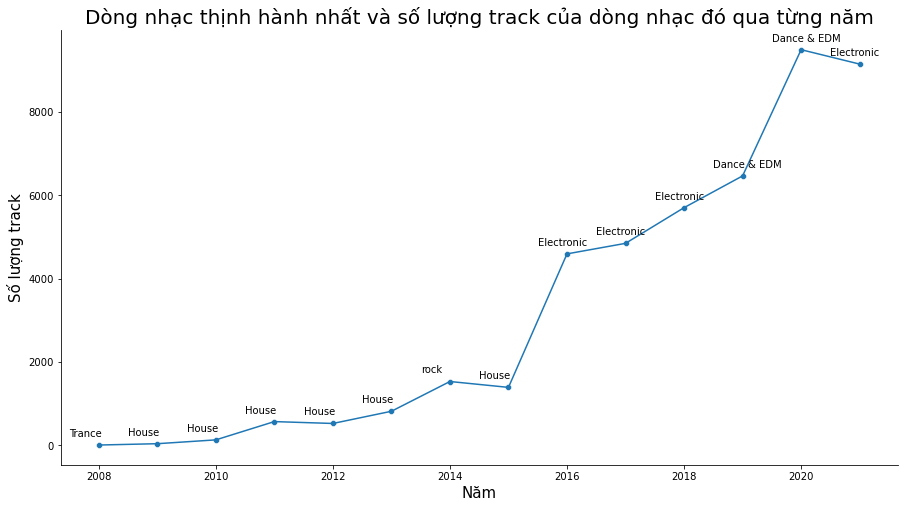

In [41]:
# Dòng nhạc thịnh hành qua từng năm
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Số lượng track
ax = sns.lineplot(data=grouped_data, x=grouped_data.index.to_list(), y='freq')

# Thêm tên của dòng nhạc
sns.scatterplot(data=grouped_data, x=grouped_data.index.to_list(), y='freq', markers=True, legend=False)
for i in range(grouped_data.shape[0]):
    ax.annotate(grouped_data.iloc[i, 2], (grouped_data.index[i] - 0.5, grouped_data.iloc[i, -1] + 200))

# Tùy chỉnh biểu đồ
ax.set_title('Dòng nhạc thịnh hành nhất và số lượng track của dòng nhạc đó qua từng năm', fontdict={'size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Năm', fontdict={'size':15})
ax.set_ylabel('Số lượng track', fontdict={'size':15})

Với các kết quả thu được, chúng ta có các nhận xét sau:
- Các dòng nhạc **Electronic** thống trị *Soundcloud*.
- Có sự tăng mạnh số lượng track trong năm 2016 và năm 2020 bởi một số nguyên nhân sau:
  - **Năm 2016**: sự nổi lên của phong cách **Mumble Rap** với giai điệu đơn giản và bắt tai đã lan truyền mạnh mẽ trên *Soundcloud*.
  - **Năm 2020**: sự xuất hiện của **Covid-19** và phong tỏa ở nhiều nước phần nào đó ảnh hưởng đến số lượng track tăng cao.
- Với sự tăng lên của số lượng track qua từng năm cho ta thấy rằng sự phổ biến của nền tảng chia sẻ nhạc miễn phí *Soundcloud* càng ngày càng rộng rãi với những nhà sản xuất nhạc thiếu điều kiện, đặc biệt là giới *Underground*.
### Đất nước có nhiều nghệ sĩ được xác minh (verified)
Với câu hỏi này, ta sẽ sử dụng dữ liệu `user` với các trường: `country_code` và `verified`. Cụ thể, ta sẽ đếm số lượng nghệ sĩ *được xác minh* trong từng quốc gia. Các bước thực hiện:
1. Lựa ra các dòng có cột `verified` bằng `True`
2. Nhóm dữ liệu bởi trường `country_code`.
3. Đếm số lượng nghệ sĩ `verified`.
4. Trực quan hóa **10** quốc gia có nhiều nghệ sĩ verified nhất bằng **Bar chart**.

In [42]:
# Clone dữ liệu để tránh chỉnh sửa dữ liệu gốc
data_df = user_df[['country_code', 'verified']].copy()

# Lựa ra nghệ sĩ verified
data_df = data_df.loc[data_df['verified'] == True]

# Nhóm dữ liệu bởi trường country_code
grouped_data = data_df.groupby(by=['country_code'])

# Đếm số lượng nghệ sĩ verified và sort theo descending
grouped_data = grouped_data.count().sort_values(by='verified',ascending=False)

grouped_data.head(10)

,verified
country_code,
unknown,1642
US,512
GB,157
NL,147
DE,135
FR,111
CA,101
AU,79
BR,64


Tiếp theo là tiến hành trực quan hóa dữ liệu. Thế nhưng nếu chỉ để nguyên giá trị `country_code` sẽ gây khó hiểu, do đó, chúng ta sẽ replace các giá trị này bằng tên của Quốc gia tương ứng.

Text(0, 0.5, 'Tên quốc gia')

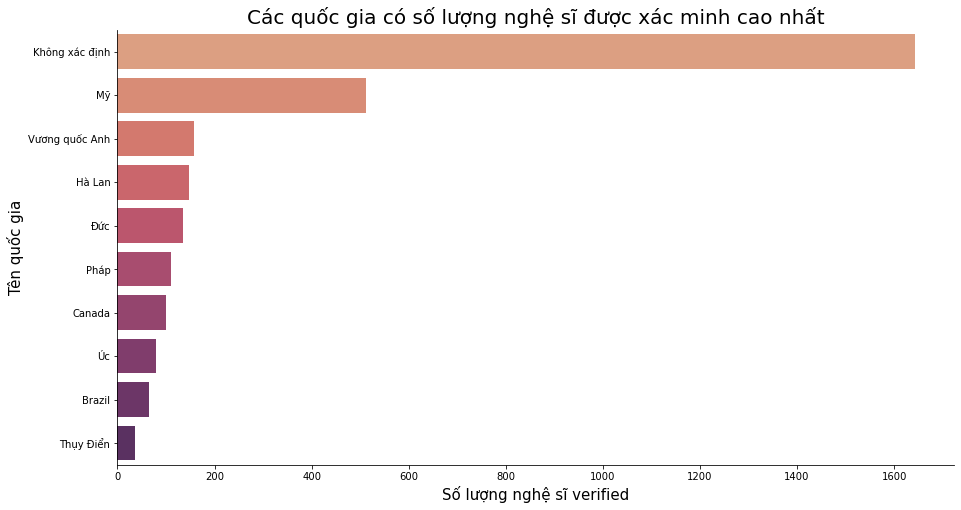

In [43]:
# Gán lại tên các Quốc gia
plot_data = grouped_data[:10]
plot_data.index = ['Không xác định', 'Mỹ', 'Vương quốc Anh', 'Hà Lan', 'Đức', 'Pháp', 'Canada', 'Úc', 'Brazil', 'Thụy Điển']

# 10 Quốc gia có số lượng nghệ sĩ verified nhiều nhất
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Barplot
ax = sns.barplot(data=plot_data[:10], y=plot_data.index[:10], x='verified', palette='flare')

# Tùy chỉnh biểu đồ
ax.set_title('Các quốc gia có số lượng nghệ sĩ được xác minh cao nhất', fontdict={'size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Số lượng nghệ sĩ verified', fontdict={'size':15})
ax.set_ylabel('Tên quốc gia', fontdict={'size':15})

Dựa vào các kết quả thu được, chúng ta có các nhận xét sau:
- Thật ngạc nhiên khi mà số nghệ sĩ có quốc gia không xác định lại được **xác minh** nhiều đến thế. Có thể *quốc gia* không phải là tiêu chí để *Soundcloud* xác minh nghệ sĩ.
- Nếu không tính quốc gia không xác định thì **Mỹ** là quốc gia có *số lượng nghệ sĩ được xác minh nhiều nhất*, hơn vượt bậc so với quốc gia xếp hạng kế tiếp: Vương quốc Anh. Nguyên do có thể là do **Mỹ** có số lượng **Rapper** (chủ yếu là các Rapper da màu) nhiều mà theo như chúng ta đã phân tích ở câu hỏi trước thì *Soundcloud* rất phổ biến cho giới *Underground*, đặc biệt là **Rapper**.
- Ngoài ra, chúng ta có thể thấy rằng đa số các quốc gia ở đây là các *quốc gia phát triển* và hầu như ngôn ngữ chủ yếu là *tiếng Anh* (Châu Âu và Bắc Mĩ).

### Sự tương quan giữa nghệ sĩ được xác minh (verified) và lượt nghe các track của họ
Để giải quyết câu hỏi này, chúng ta sẽ sử dụng cả 2 bảng `user` và `track`. Cụ thể, với mỗi nghệ sĩ (user), ta đếm số lượng nghe lại của các bài hát thuộc về user đó. Sau đó, chia thành 2 nhóm *được xác minh* và *chưa được xác minh*, rồi tiến hành so sánh dựa trên phân bố của chúng. Các bước thực hiện:
1. Với bảng `track`, nhóm dữ liệu bởi `user_id` và đếm tổng số `playback_count` của user đó.
2. Inner join với bảng `user` dựa trên `user_id`.
3. Dùng **Box plot** trực quan hóa phân bố `playback_count` của 2 nhóm: *chưa được xác minh* và *đã được xác minh*
4. Dùng thống kê để tính chính xác *Tứ phân vị* của dữ liệu.

In [55]:
# Clone dữ liệu để tránh chỉnh sửa trên dữ liệu gốc
data_df = track_df[['playback_count', 'user_id']]

# Nhóm dữ liệu bởi user_id
grouped_data = data_df.groupby(by='user_id')

# Tỉnh tổng playback_count
grouped_data = grouped_data.sum()

# Inner join với bảng user dựa trên user_id
merged_data = pd.merge(left=grouped_data,
                       right=user_df[['id', 'verified']],
                       left_on='user_id',
                       right_on='id',
                       how='inner'
                      )

# Chỉnh sửa lại kiểu dữ liệu cột verified
merged_data['verified'] = merged_data['verified'].apply(lambda val: str(val)) 

merged_data

,playback_count,id,verified
0,1130385.0,187,True
1,455130.0,193,True
2,38979045.0,203,True
3,38979045.0,203,True
4,4699872.0,215,True
...,...,...,...
8870,491.0,1041176245,False
8871,489.0,1041442963,False
8872,77.0,1042109443,False
8873,5720.0,1043011867,False


Tiếp theo, ta tiến hành trực quan hóa dữ liệu bằng **Box plot**.

[Text(0, 0, 'Đã xác minh'), Text(0, 1, 'Chưa xác minh')]

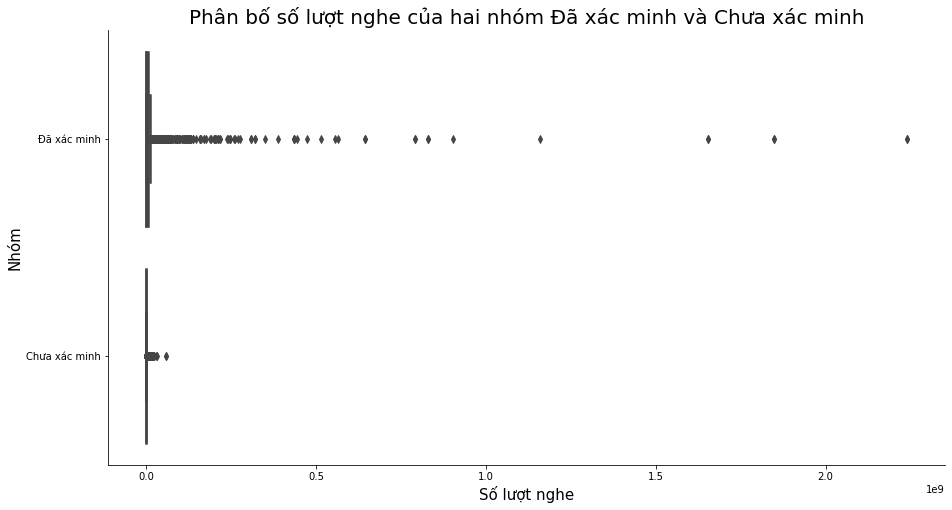

In [71]:
# Phân bố số lượt nghe của hai nhóm Đã xác minh và Chưa xác minh
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Boxplot
ax = sns.boxplot(data=merged_data, 
                 x='playback_count', 
                 y='verified', 
                 palette='hot', 
                 linewidth=2.5,
                 fliersize=5,
                 order=['True', 'False']
                )

# Tùy chỉnh biểu đồ
ax.set_title('Phân bố số lượt nghe của hai nhóm Đã xác minh và Chưa xác minh', fontdict={'size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Số lượt nghe', fontdict={'size':15})
ax.set_ylabel('Nhóm', fontdict={'size':15})
ax.set_yticklabels(labels=['Đã xác minh', 'Chưa xác minh'])

Biểu đồ ở trên không thể hiện rõ *Tứ phân vị* (Quartile) của dữ liệu, nên ta sẽ tự tính toán các con số

In [73]:
# Thống kê của dữ liệu
merged_data[['playback_count', 'verified']].groupby(by='verified').describe()

playback_count                                                        \
                  count          mean           std   min       25%       50%   
verified                                                                        
False            5870.0  2.947729e+05  1.818978e+06   0.0    2075.0   15104.5   
True             3005.0  1.691470e+07  1.033694e+08  28.0  202711.0  961183.0   

                                    
                 75%           max  
verified                            
False       91046.25  5.989130e+07  
True      4882021.00  2.239520e+09

Với các kết quả ở trên, ta có nhận xét sau:
- Dễ dàng thấy được số lượt nghe của nhóm **Đã xác minh** cao hơn hẳn so với nhóm **Chưa xác minh** qua các thông kê như **mean** và **median**. Chúng ta có thể giải thích điều này như sau: các nghệ sĩ **được xác minh** phải là nghệ sĩ *nổi tiếng*, vì vậy số lượt nghe của họ được *buff* với lượng fan đông đảo sẵn sàng *cày* lượt nghe cho idol của mình.